<a href="https://www.kaggle.com/code/terrymoyo/ripple-renewable-energy-terrymoyon?scriptVersionId=205233357" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd

In [2]:
aqi = pd.read_csv('/kaggle/input/ripple-renewable-energy/c4_epa_air_quality.csv')

In [3]:
print("Use describe() to summarize AQI")
print(aqi.describe(include='all'))
print("For a more thorough examination of observations by state use values_counts()")
print(aqi['state_name'].value_counts())

Use describe() to summarize AQI
        Unnamed: 0  date_local  state_name  county_name      city_name  \
count   260.000000         260         260          260            260   
unique         NaN           1          52          149            190   
top            NaN  2018-01-01  California  Los Angeles  Not in a city   
freq           NaN         260          66           14             21   
mean    129.500000         NaN         NaN          NaN            NaN   
std      75.199734         NaN         NaN          NaN            NaN   
min       0.000000         NaN         NaN          NaN            NaN   
25%      64.750000         NaN         NaN          NaN            NaN   
50%     129.500000         NaN         NaN          NaN            NaN   
75%     194.250000         NaN         NaN          NaN            NaN   
max     259.000000         NaN         NaN          NaN            NaN   

       local_site_name   parameter_name   units_of_measure  arithmetic_mean  \


The above data covers the time range of January 1st 2018.
The min AQI value is 0. The max is 50

In [4]:
#Create list of RRE states.
rre_states = ['California','Florida','Michigan','Ohio','Pennsylvania','Texas']
#Subset 'aqi' to only consider these states.
aqi_rre = aqi[aqi['state_name'].isin(rre_states)]
#Find the mean aqi for each of the RRE states.
aqi_rre.groupby(['state_name']).agg({"aqi":"mean","state_name":"count"})

,aqi,state_name
state_name,,
California,12.121212,66
Florida,5.500000,12
Michigan,8.111111,9
Ohio,3.333333,12
Pennsylvania,2.900000,10
Texas,2.700000,10


Boxplot visualization for the AQI of these states

In [5]:
import seaborn as sns

<Axes: xlabel='state_name', ylabel='aqi'>

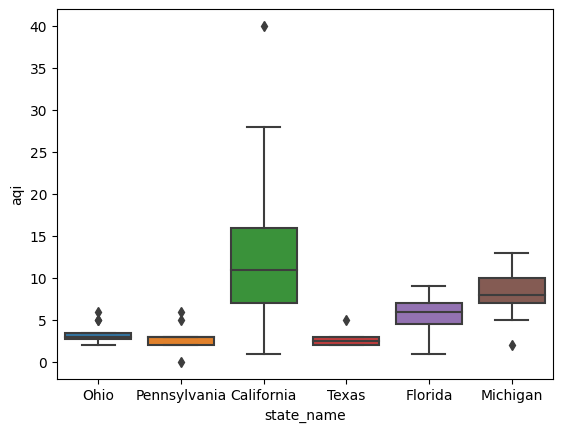

In [6]:
sns.boxplot(x=aqi_rre["state_name"],y=aqi_rre["aqi"])

Based on the data and visualizations the states mostly affected by this policy are California (range is over 10) and Michigan (boxplot also ranges beyond 10)

Sample Statistic

In [7]:
aqi_ca = aqi[aqi['state_name']=='California']
sample_mean = aqi_ca['aqi'].mean()
sample_mean

12.121212121212121

Confidence level

In [8]:
confidence_level = 0.95
confidence_level

0.95

Margin of error

In [9]:
#Calculate margin of error
z_value = 1.96

#Calculate standard error
standard_error = aqi_ca['aqi'].std() / np.sqrt(aqi_ca.shape[0])
print("standard error:")
print(standard_error)

#Use the preceding result to calculate the margin of error.

margin_of_error = standard_error * z_value
print("margin of error:")
print(margin_of_error)

standard error:
0.8987209641127412
margin of error:
1.7614930896609726


Interval

In [10]:
upper_ci_limit = sample_mean + margin_of_error
lower_ci_limit = sample_mean - margin_of_error
(lower_ci_limit, upper_ci_limit)


(10.359719031551148, 13.882705210873095)

Confidence interval using scipy.stats.norm.interval()

In [11]:
from scipy import stats

In [12]:
stats.norm.interval(confidence=confidence_level, loc=sample_mean, scale=standard_error)

(10.359751399400034, 13.882672843024208)

There is a 95% confidence that the population mean AQI for California is between 10.36 and 13.88. The range is notably greater than 10.